<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h1>Curso : Computación 2</h1> </center> 

<center> <h2>Docentes: Ingeniero Renzo Bolivar</h2> </center> 

<center> <h2>Alumno: Alanoca Maquera Brandon Yoel</h2> </center> 

<center> <h2>TEMA: WEB SCRAPING</h2> </center> 

## 1.ANALIZAR EL CONTENIDO DE LA PAGINA METACRITIC

In [1]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from random import randint
from qgrid import show_grid
import seaborn as sns
#from pandas_profiling import ProfileReport
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars


In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}


In [3]:
pages = [str(i) for i in range(0,10,2)]

In [4]:

contenido = requests.get('https://www.metacritic.com/browse/movies/score/metascore/all/filtered?page=', headers=headers)
soup = BeautifulSoup(contenido.text, 'html.parser')


### 1.1 VISUALIZACION CONTENIDO DE UNA SOLA PELICULA


In [5]:
# buscamos las etiquetas correspondientes

# Buscar la etiquera que gurada toda la informacion 
contenido = soup.find_all('td', class_='clamp-summary-wrap')  
print(type(contenido))

<class 'bs4.element.ResultSet'>


In [6]:
#nos muestra que toma todas las peliculas de la pagina 
len(contenido)


100

In [7]:
#para una sola peliula observamos 
contenido[1]

<td class="clamp-summary-wrap">
<input class="clamp-summary-expand" id="522553" type="checkbox">
<div class="clamp-score-wrap">
<a class="metascore_anchor" href="/movie/the-godfather/critic-reviews">
<div class="metascore_w large movie positive perfect">100</div>
</a>
</div>
<span class="title numbered">
                                                                    2.
                                                            </span>
<a class="title" href="/movie/the-godfather"><h3>The Godfather</h3></a>
<div class="clamp-details">
<span>March 24, 1972</span>
<span class="cert_rating R"> | R</span>
</div>
<div class="summary">
                        Francis Ford Coppola's epic features Marlon Brando in his Oscar-winning role as the patriarch of the Corleone family. Director Coppola paints a chilling portrait of the Sicilian clan's rise and near fall from power in America, masterfully balancing the story between the Corleone's family life and the ugly crime business in which the

In [8]:
#Accedemos a los nombres de las peliculas 
pelicula = contenido[1]
pelicula.find('h3').text


'The Godfather'

In [9]:
#Accedemos a  la fecha de estreno 
fecha=contenido[1]
fecha.select('div.clamp-details span')[0].text


'March 24, 1972'

In [10]:
#calificacion de la pelicula
fecha.select('div.clamp-details span')[1].text

' | R'

In [11]:
#metascore de la pelicula
pelicula.select('a.metascore_anchor div')[0].text

'100'

In [12]:
#puntuacion de la pelicula
pelicula.select('a.metascore_anchor div')[2].text

'9.2'

## 2.GENERAR CODIGO PARA TODAS LAS PAGINAS

In [13]:

# Listas para almacenar los datos extraídos
nombres = []
fecha_de_lanzamiento = []
clasificaciones = []
meta_scores = []
puntuacion_de_usuarios = []


pages = [str(i) for i in range(0,20,2)]
# Iterar por las páginas
for page in pages:
    # Hacer una solicitud GET
    url_pag = get('https://www.metacritic.com/browse/movies/score/metascore/all/filtered?page=' + str(page), headers=headers)
    
    # Pausar el bucle durante 8-20 segundos
    sleep(randint(1, 2))
    
    # Analizar el contenido de la respuesta en un objeto BeautifulSoup
    pel_soup = BeautifulSoup(url_pag.text, 'html.parser')
    
    # Encontrar el contenedor principal peculiar de cada película
    contenido = pel_soup.find_all('td', class_='clamp-summary-wrap')
    
    # Iterar a través de los contenedores
    for cont in contenido:
        # Extraer el nombre de la película
        nombre = cont.find('h3').text.strip()
        nombres.append(nombre)
    
        # Extraer la fecha de lanzamiento
        fecha = cont.select('div.clamp-details span')[0].text.strip()
        fecha_de_lanzamiento.append(fecha)
    
        # Extraer la calificación (verificación de índice)
        clasificacion = cont.select('div.clamp-details span')
        clasificacion = cont.select('div.clamp-details span')[1].text if len(clasificacion) > 1 else 'N/A'
        clasificaciones.append(clasificacion)
      
        #extraer meta scores
        meta_score= cont.select('a.metascore_anchor div')[0].text
        meta_scores.append(meta_score)
    
        #extraer puntuacion de usuarios
        puntuacion_de_usuario = cont.select('a.metascore_anchor div')[2].text
        puntuacion_de_usuarios.append(puntuacion_de_usuario)


In [14]:
#convertimos a Dataframe

pelicula_df = pd.DataFrame({
    'Nombres': nombres,
    'Fecha_de_lanzamiento': fecha_de_lanzamiento,
    'Clasificaciones': clasificaciones,
    'Meta_scores': meta_scores,
    'Puntuacion_de_usuarios': puntuacion_de_usuarios})

pelicula_df


,Nombres,Fecha_de_lanzamiento,Clasificaciones,Meta_scores,Puntuacion_de_usuarios
0,Tokyo Story,"March 13, 1972",| Not Rated,100,8.7
1,The Godfather,"March 24, 1972",| R,100,9.2
2,Citizen Kane,"September 4, 1941",| Approved,100,8.4
3,Rear Window,"September 1, 1954",| TV-G,100,8.7
4,Casablanca,"January 23, 1943",| TV-PG,100,8.8
...,...,...,...,...,...
995,The Fighter,"December 10, 2010",| R,79,8.1
996,Jodorowsky's Dune,"March 21, 2014",| Not Rated,79,8.2
997,The Five Obstructions,"May 26, 2004",| Unrated,79,6.9
998,Beasts of No Nation,"October 16, 2015",| Not Rated,79,8.2


In [15]:
print(pelicula_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nombres                 1000 non-null   object
 1   Fecha_de_lanzamiento    1000 non-null   object
 2   Clasificaciones         1000 non-null   object
 3   Meta_scores             1000 non-null   object
 4   Puntuacion_de_usuarios  1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB
None


In [16]:

# Guardar el DataFrame como archivo CSV
pelicula_df.to_csv('ruta_del_archivo.csv', index=False)


# 3. ANALISIS DE DATOS 

In [17]:
from matplotlib import pyplot as plt

In [18]:
pel_dfcopia = pelicula_df.copy() 

In [19]:
pel_dfcopia

,Nombres,Fecha_de_lanzamiento,Clasificaciones,Meta_scores,Puntuacion_de_usuarios
0,Tokyo Story,"March 13, 1972",| Not Rated,100,8.7
1,The Godfather,"March 24, 1972",| R,100,9.2
2,Citizen Kane,"September 4, 1941",| Approved,100,8.4
3,Rear Window,"September 1, 1954",| TV-G,100,8.7
4,Casablanca,"January 23, 1943",| TV-PG,100,8.8
...,...,...,...,...,...
995,The Fighter,"December 10, 2010",| R,79,8.1
996,Jodorowsky's Dune,"March 21, 2014",| Not Rated,79,8.2
997,The Five Obstructions,"May 26, 2004",| Unrated,79,6.9
998,Beasts of No Nation,"October 16, 2015",| Not Rated,79,8.2


In [20]:
status(pel_dfcopia)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Nombres,0,0.0,0,0.0,998,object
1,Fecha_de_lanzamiento,0,0.0,0,0.0,865,object
2,Clasificaciones,0,0.0,0,0.0,20,object
3,Meta_scores,0,0.0,0,0.0,19,object
4,Puntuacion_de_usuarios,0,0.0,0,0.0,55,object


In [21]:
pel_dfcopia['Nombres'] = pel_dfcopia['Nombres'].astype('category')
#pel_dfcopia['Fecha_de_lanzamiento'] = pd.to_datetime(pel_dfcopia['Fecha_de_lanzamiento'])
pel_dfcopia['Fecha_de_lanzamiento'] = pd.to_datetime(pel_dfcopia['Fecha_de_lanzamiento'], errors='coerce')

pel_dfcopia['Clasificaciones'] = pel_dfcopia['Clasificaciones'].astype('category')
pel_dfcopia['Meta_scores'] = pd.to_numeric(pel_dfcopia['Meta_scores'], errors='coerce')
pel_dfcopia['Puntuacion_de_usuarios'] = pd.to_numeric(pel_dfcopia['Puntuacion_de_usuarios'], errors='coerce')


In [22]:
status(pel_dfcopia)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Nombres,0,0.000,0,0.0,998,category
1,Fecha_de_lanzamiento,9,0.009,0,0.0,864,datetime64[ns]
2,Clasificaciones,0,0.000,0,0.0,20,category
3,Meta_scores,0,0.000,0,0.0,19,int64
4,Puntuacion_de_usuarios,126,0.126,0,0.0,54,float64


In [23]:
pel_dfcopia['Puntuacion_de_usuarios'].fillna(0, inplace=True)


In [24]:
status(pel_dfcopia)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Nombres,0,0.000,0,0.000,998,category
1,Fecha_de_lanzamiento,9,0.009,0,0.000,864,datetime64[ns]
2,Clasificaciones,0,0.000,0,0.000,20,category
3,Meta_scores,0,0.000,0,0.000,19,int64
4,Puntuacion_de_usuarios,0,0.000,126,0.126,55,float64


In [25]:
pel_dfcopia.isnull().sum()

Nombres                   0
Fecha_de_lanzamiento      9
Clasificaciones           0
Meta_scores               0
Puntuacion_de_usuarios    0
dtype: int64

In [26]:
#convertimos los objet 

In [27]:
# Obtener las columnas del DataFrame
columnas = pel_dfcopia.columns

# Imprimir las columnas

print(columnas)

Index(['Nombres', 'Fecha_de_lanzamiento', 'Clasificaciones', 'Meta_scores',
       'Puntuacion_de_usuarios'],
      dtype='object')


In [28]:
# Ordenar el DataFrame por puntajes de usuario de forma descendente
pel_dfcopia = pel_dfcopia.sort_values('Puntuacion_de_usuarios', ascending=False)

# Seleccionar los 20 nombres con los mayores puntajes de usuario
top_20_nombres = pel_dfcopia.nlargest(20, 'Puntuacion_de_usuarios')['Nombres']

# Imprimir los nombres seleccionados
print("Los 20 nombres con los mayores puntajes de usuario:")
print(top_20_nombres)


Los 20 nombres con los mayores puntajes de usuario:
1                                       The Godfather
48                                      Spirited Away
88                                       Pulp Fiction
604    Star Wars: Episode V - The Empire Strikes Back
163                            The Godfather: Part II
448                                   The Dark Knight
778                                           Memento
256             The Lord of the Rings: The Two Towers
87                                   Schindler's List
36                                             Psycho
49                                          Toy Story
794                                        Your Name.
646                                          Face/Off
4                                          Casablanca
84                                       A Separation
185                                   The Incredibles
361                                           Traffic
18                            

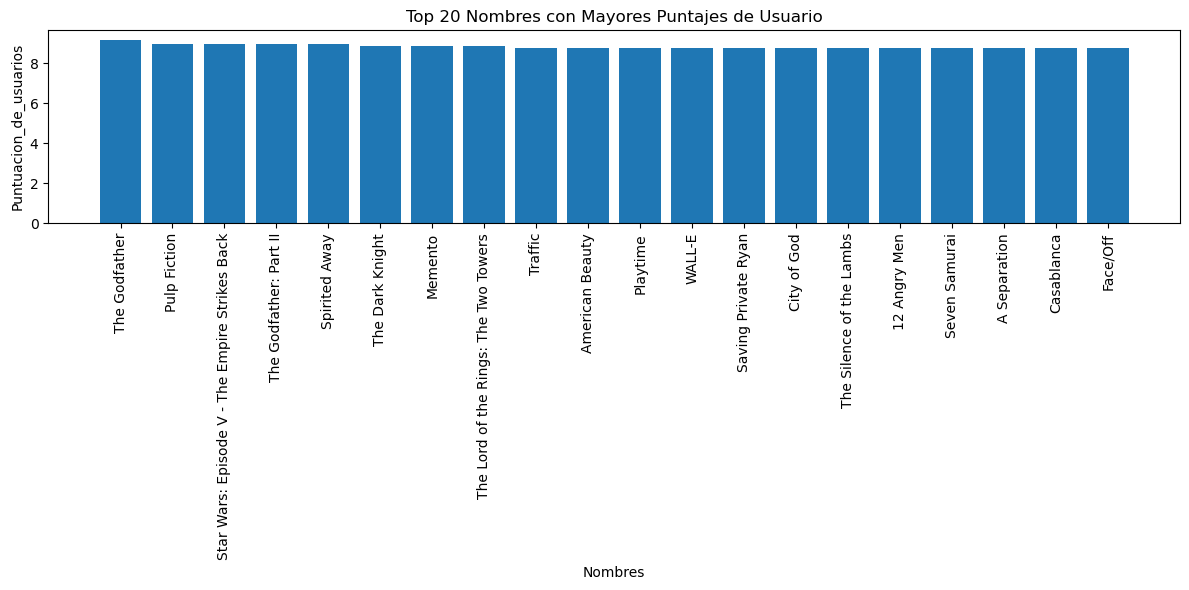

In [29]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por puntajes de usuario de forma descendente
pel_dfcopia = pel_dfcopia.sort_values('Puntuacion_de_usuarios', ascending=False)

# Seleccionar los 20 nombres con los mayores puntajes de usuario
top_20 = pel_dfcopia.nlargest(20, 'Puntuacion_de_usuarios')

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_20['Nombres'], top_20['Puntuacion_de_usuarios'])
plt.title('Top 20 Nombres con Mayores Puntajes de Usuario')
plt.xlabel('Nombres')
plt.ylabel('Puntuacion_de_usuarios')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


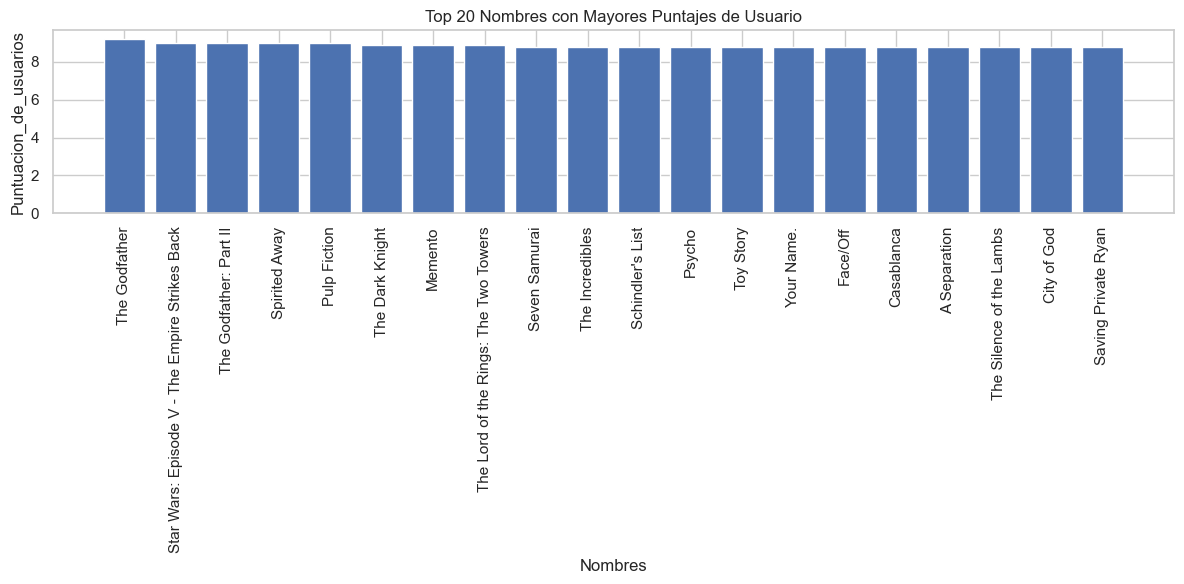

In [31]:

# Ordenar el DataFrame por puntajes de usuario de forma descendente
pel_dfcopia = pel_dfcopia.sort_values('Puntuacion_de_usuarios', ascending=False)

# Seleccionar los 20 nombres con los mayores puntajes de usuario
top_20_max = pel_dfcopia.nlargest(20, 'Puntuacion_de_usuarios')

# Configurar el gráfico de barras para los 20 máximos puntajes de usuario
plt.figure(figsize=(12, 6))
plt.bar(top_20_max['Nombres'], top_20_max['Puntuacion_de_usuarios'])
plt.title('Top 20 Nombres con Mayores Puntajes de Usuario')
plt.xlabel('Nombres')
plt.ylabel('Puntuacion_de_usuarios')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico de los 20 máximos puntajes de usuario
plt.show()



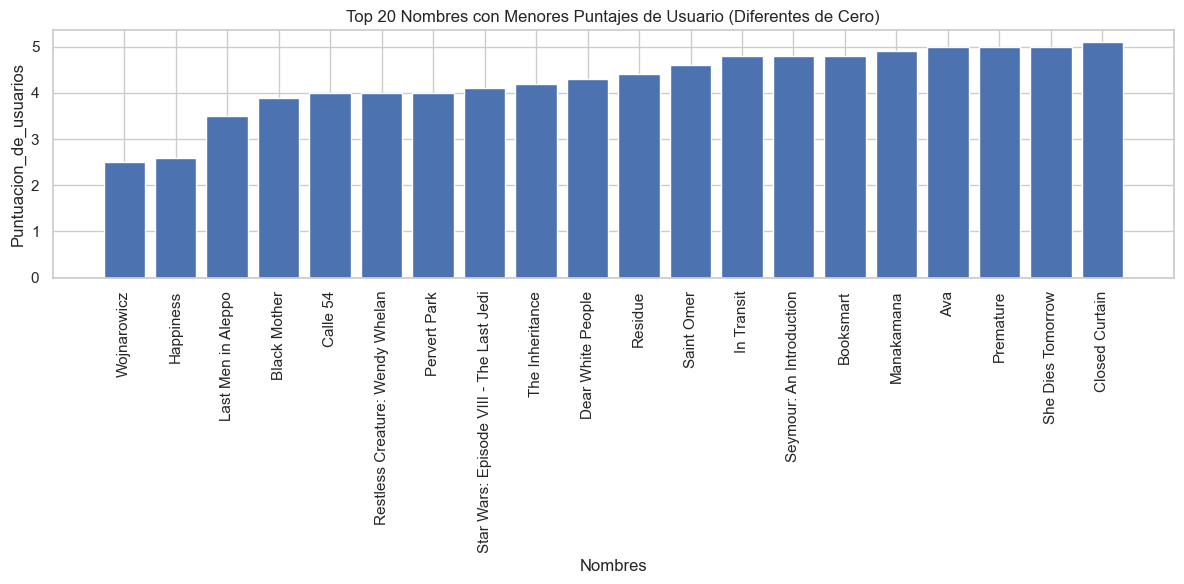

In [32]:
# Filtrar los valores diferentes de cero en los puntajes de usuario
nonzero_scores = pel_dfcopia[pel_dfcopia['Puntuacion_de_usuarios'] != 0]

# Seleccionar los 20 nombres con los menores puntajes de usuario diferentes de cero
top_20_min = nonzero_scores.nsmallest(20, 'Puntuacion_de_usuarios')

# Configurar el gráfico de barras para los 20 mínimos puntajes de usuario diferentes de cero
plt.figure(figsize=(12, 6))
plt.bar(top_20_min['Nombres'], top_20_min['Puntuacion_de_usuarios'])
plt.title('Top 20 Nombres con Menores Puntajes de Usuario (Diferentes de Cero)')
plt.xlabel('Nombres')
plt.ylabel('Puntuacion_de_usuarios')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico de los 20 mínimos puntajes de usuario diferentes de cero
plt.show()

In [33]:
print(top_20_min)

                                     Nombres Fecha_de_lanzamiento  \
175                              Wojnarowicz           2021-03-19   
767                                Happiness           1998-10-16   
876                       Last Men in Aleppo           2017-05-03   
353                             Black Mother           2019-03-08   
464                                 Calle 54           2000-10-20   
263          Restless Creature: Wendy Whelan           2017-05-24   
847                             Pervert Park           2016-05-20   
467  Star Wars: Episode VIII - The Last Jedi           2017-12-15   
306                          The Inheritance           2021-03-12   
965                        Dear White People           2014-10-17   
600                                  Residue           2020-09-17   
133                               Saint Omer           2023-01-13   
206                               In Transit           2017-06-23   
577                 Seymour: An In

In [34]:
# Agrupar por año de lanzamiento y calcular la puntuación promedio de usuarios
dfaño = pel_dfcopia.groupby(pel_dfcopia['Fecha_de_lanzamiento'].dt.year)['Puntuacion_de_usuarios'].mean()

# Convertir el resultado a un nuevo DataFrame
dfaño= pd.DataFrame(dfaño).reset_index()

# Renombrar las columnas
dfaño.columns = ['Año de Lanzamiento', 'Puntuación Promedio de Usuarios']

# Ordenar por año de lanzamiento
dfaño= dfaño.sort_values('Año de Lanzamiento')



In [35]:
dfaño

,Año de Lanzamiento,Puntuación Promedio de Usuarios
0,1916.0,7.100000
1,1926.0,8.500000
2,1927.0,0.000000
3,1929.0,2.633333
4,1930.0,8.400000
...,...,...
92,2019.0,6.187805
93,2020.0,5.944444
94,2021.0,5.598000
95,2022.0,6.135294


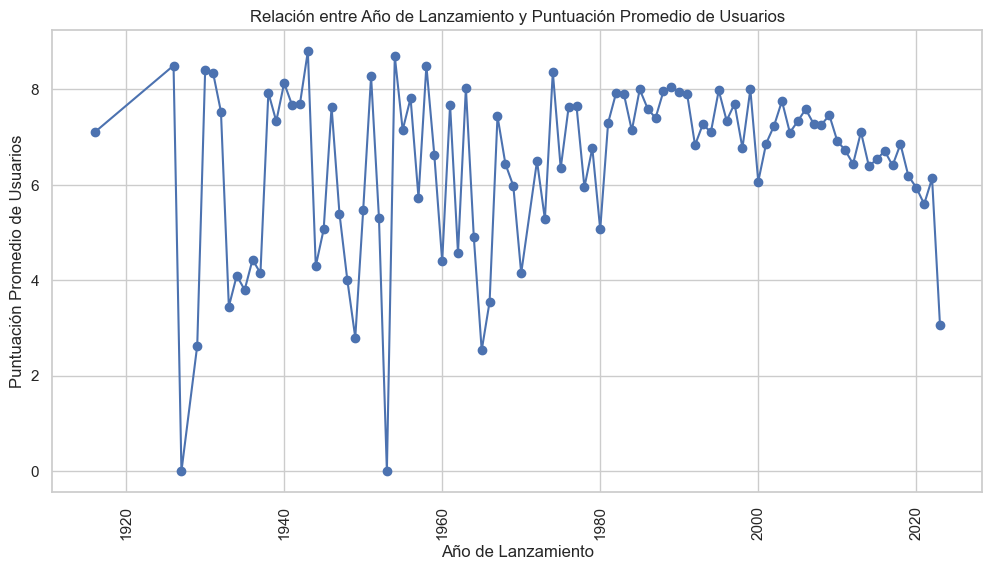

In [37]:
import matplotlib.pyplot as plt

# Graficar el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(dfaño['Año de Lanzamiento'], dfaño['Puntuación Promedio de Usuarios'], marker='o')
plt.title('Relación entre Año de Lanzamiento y Puntuación Promedio de Usuarios')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Puntuación Promedio de Usuarios')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
